In [240]:
using DynamicalSystems
using Plots
pyplot()

Plots.PyPlotBackend()

In [171]:
f(x, mu) = sin(x)/(1 - mu * cos(x))

function eom(x, p, t)
    y1 = x[1] + p[1]^2 * f(x[3], p[3]) + p[1]*p[2] * (f(x[3]+x[4], p[3]) + f(x[3]-x[4], p[3]))
    y2 = x[2] + p[1]^2 * f(x[4], p[3]) + p[1]*p[2] * (f(x[3]+x[4], p[3]) - f(x[3]-x[4], p[3]))     
    return SVector{4}(
        y1,
        y2,
        x[3] + y1,
        x[4] + y2
    ) .% (2pi)
end

state = zeros(4)
p = [0.25, 0.1, 0.5]

map_4d = DiscreteDynamicalSystem(eom, state, p)

tr = trajectory(map_4d, 400, [0.5pi,0.5pi,0,0])

#tr[:, 2][(tr[:, 3] + tr[:, 4]) .< 0.02 ]

function plot_many()
    l = 44
    a = hcat(rand(Float64,l,2) * 2pi, zeros(l,2)) 
    a = vcat(a, [pi pi 0 0])
    a = vcat(a, [3 3 0 0])
    a = vcat(a, [1 3 0 0])
    a = vcat(a, [3 1 0 0])
    for i in 1:l
        tr = trajectory(map_4d, 5000, a[i,:])
        plot(tr[:, 1]/(2pi), tr[:, 2]/(2pi), lw = 0.0, marker = "o", ms = 0.1, alpha = 0.5);
    end
end


plot_many (generic function with 1 method)

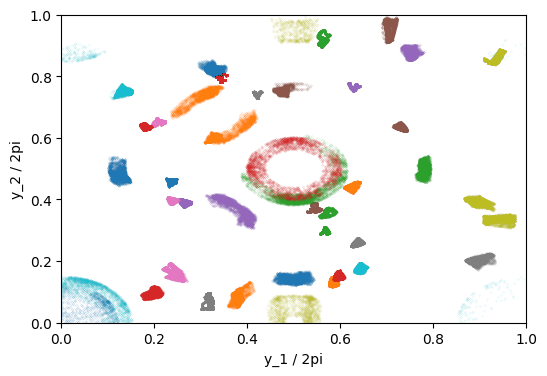

In [172]:
figure(figsize=(6,4))
#plot(tr[:, 1]/(2pi), tr[:, 2]/(2pi), lw = 0.0, marker = "o", ms = 0.1, alpha = 0.5);
plot_many()
xlabel("y_1 / 2pi"); ylabel("y_2 / 2pi");

ax = gca()
ax[:set_ylim]([0,1])
ax[:set_xlim]([0,1])

savefig("4d_map.pdf")

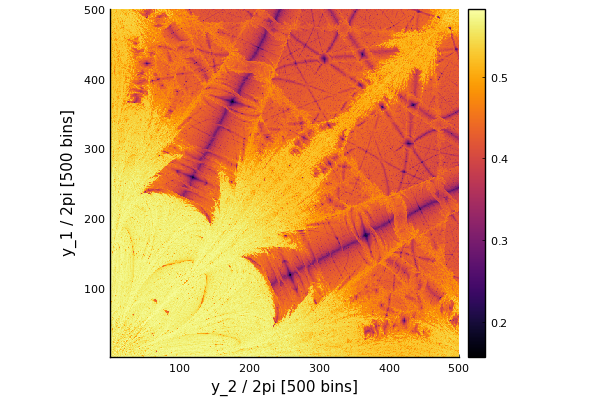

In [245]:
n = 500
lattice = zeros(n, n)
for i in 1:n
    for j in 1:n
        tr = Matrix{Float64}(undef, 0, 4)
        for k in 1:4
            tr = vcat(tr, Matrix(trajectory(map_4d, 400, [0.5pi*(i-1)/n, 0.5pi*(j-1)/n, 0, 0] + vcat(rand(Float64,2) * 0.5pi/n/100, [0, 0]) ))) 
        end
        lattice[i,j] = log(size(unique(floor.(Int, Matrix(tr) ./ (2pi/n))[:,1:2], dims=1), 1)) / log(n^2)
    end
end

s = heatmap(1:n, 1:n, lattice, aspect_ratio = 1, xlabel="y_2 / 2pi [500 bins]", ylabel="y_1 / 2pi [500 bins]")

s


In [242]:
savefig("numerical_entropy.pdf")

In [231]:
vcat(rand(Float64,2) * 0.5pi/100, [0, 0]) + [11, 11, 11, 11]

4-element Vector{Float64}:
 11.006346122258005
 11.00521084181393
 11.0
 11.0